## Mathematik für Biologiestudierende II

Sommersemester 2024

09.07.2024

&copy; 2024 Prof. Dr. Rüdiger W. Braun 

In [4]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.formula.api as smf
import seaborn as sns
sns.set_theme()
import warnings
warnings.filterwarnings('ignore', message='The figure layout has changed')

# Regression im exponentiellen Modell

## Beispiel Elektrophorese


### Proteinanalyse durch Elektrophorese

* Die Molekülmasse eines Proteins wird bestimmt, indem man seinen Laufweg in einem Gel misst, an welches eine Spannung angelegt wird.
* Dazu muss das Protein zuerst aufbereitet werden; dieser Aspekt ist Thema von Biologie~110.
* Das aufbereitete Protein wird zusammen mit sechs Referenzproteinen bekannter Massenzahl und einem Farbstoff in der Elektrophoreseapparatur einer Spannungsdifferenz ausgesetzt.  Die Spannung wird abgeschaltet, sobald der Farbstoff die Apparatur durchlaufen hat.

### Elektrophoreseapparatur

<img src="bilder/elektrophorese1.png" alt="Elektrophoreseapparatur" height="100%"/>

&copy; Prof. Dr. Schmitt-Wrede, HHU Düsseldorf

* Die linke Spur zeigt zuunterst die Lauffront des Farbmarkers und darüber die Lauffronten der Referenzproteine.
* Die Zahlen bedeuten jeweils die Molekülmassen der Referenzproteine in Dalton sowie ihren relativen Laufweg.
* Die rechte Spur stammt von einem bakteriellen Proteinextrakt.  Bestimmt werden soll die Molekülmasse des mit * gekennzeichnete Bestandteils.

### Elektrophorese, Fortsetzung

* Ein Dalton ist das Gewicht eines Nukleons. 
* Der Laufweg ist so normiert, dass der Laufweg des Farbmarkers die Länge 1 hat.  Der kürzeste Laufweg ist oben.
* Es besteht eine lineare Beziehung zwischen dem *Logarithmus* der Molekülmasse und der Laufstrecke des Proteins.
* Zum Eichen werden die Referenzpunkte auf halblogarithmisches Papier aufgetragen.

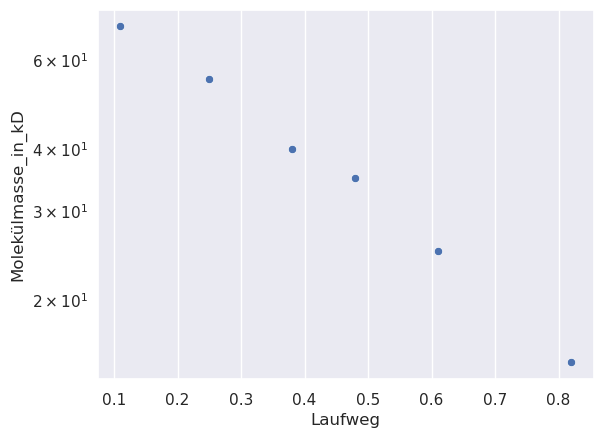

In [5]:
df = pd.DataFrame()
df['Laufweg'] = [0.11, .25, .38, .48, .61, .82]
df['Molekülmasse_in_kD'] = [70., 55, 40, 35, 25, 15]
ax = sns.scatterplot(df, x='Laufweg', y='Molekülmasse_in_kD')
ax.set_yscale('log')

* Wir bestimmen die Eichkurve durch Regression im exponentiellen Modell
* Dies geschieht zeichnerisch, indem man auf halblogarithmischem Papier die beste Gerade nach Augenschein bestimmt
* oder rechnerisch, indem man die lineare Regressionsgerade zu den Logarithmen der Molekülmassen berechnet.  Welchen Logarithmus man hier wählt, ist unerheblich.  Wir entscheiden uns für den Zehnerlogarithmus.

In [9]:
df['lg'] = np.log10(df.Molekülmasse_in_kD)
formel = 'lg ~ Laufweg'
modell = smf.ols(formel, df)
res = modell.fit()

In [11]:
res.summary()

/home/braun/mambaforge/envs/bio/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     lg   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     680.9
Date:                Sun, 07 Jul 2024   Prob (F-statistic):           1.28e-05
Time:                        17:26:41   Log-Likelihood:                 16.015
No. Observations:                   6   AIC:                            -28.03
Df Residuals:                       4   BIC:                            -28.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9672      0.018    109.160      0.000       1.917       2.017
Laufweg       -0.9424      0.036    -26.095      0.000      -1.043      -0.842
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.035
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.447
Skew:                           0.466   Prob(JB):                        0.800
Kurtosis:                       2.041   Cond. No.                         5.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
m = -0.9424
b = 1.9672

Die so bestimmte Regressionskurve ist 
$$
                y = 10^{-0.942 \cdot x + 1.97}
$$

In [14]:
x = np.linspace(0.1, 0.82, 50)
regrKurve = 10**(m*x + b)

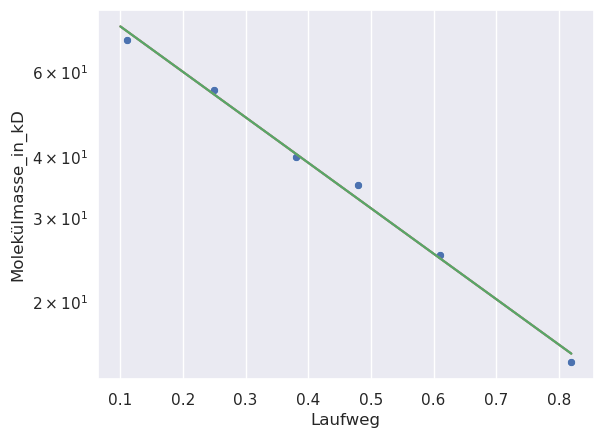

In [19]:
sns.lineplot(x=x, y=regrKurve, ax=ax)
ax.figure

Bisher haben wir nur unsere Apperatur geeicht.  Jetzt malen wir noch den Punkt hinein.

In [20]:
lweg = 0.42
masse = 10**(m*lweg+b)
masse

37.27279837239035

Das unbekannte Protein hat eine Molekularmasse von 37300 Dalton.

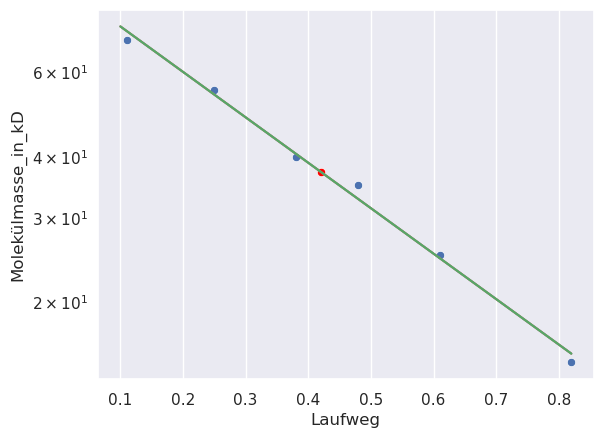

In [27]:
sns.scatterplot(x=[lweg], y=[masse], ax=ax, color='red')
ax.figure

# Logistische Regression

* Wenn die erklärte Variable nur die Werte 0 und 1 annehmen kann, kann eine logistische Regression durchgeführt werden

In [33]:
df = sns.load_dataset('titanic')

In [34]:
formula = "survived ~ sex + age + embark_town"

In [35]:
modell = smf.logit(formula, df)
res = modell.fit()

Optimization terminated successfully.
         Current function value: 0.509889
         Iterations 6


In [36]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      707
Method:                           MLE   Df Model:                            4
Date:                Sun, 07 Jul 2024   Pseudo R-squ.:                  0.2444
Time:                        17:58:50   Log-Likelihood:                -363.04
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 1.209e-49
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      2.2046      0.322      6.851      0.000       1.574       2.835
sex[T.male]                   -2.4760      0.191    -12.976      0.000      -2.850      -2.102
embark_town[T.Queenstown]     -1.8156      0.535     -3.393      0.001      -2.864      -0.767
embark_town[T.Southampton]    -1.0069      0.237     -4.251      0.000      -1.471      -0.543
age                           -0.0081      0.007     -1.233      0.217      -0.021       0.005
==============================================================================================
"""

In [42]:
anfrage = pd.DataFrame()
anfrage['sex'] = ['male', 'male', 'female']
anfrage['embark_town'] = ['Southampton', 'Southampton', 'Southampton']
anfrage['age'] = [35, 45, 45]

In [43]:
res.get_prediction(anfrage).summary_frame()

,predicted,se,ci_lower,ci_upper
0,0.173492,0.019399,0.138688,0.214852
1,0.162212,0.022490,0.122796,0.211232
2,0.697221,0.040010,0.613637,0.769514


In [76]:
df = pd.read_csv('bsp_logit.csv')
df.head()

,bestanden,ksp
0,0,6.0
1,1,6.0
2,1,6.0
3,1,5.0
4,1,6.0


In [70]:
formel = "bestanden ~ ksp"
modell = smf.logit(formel, df)
res = modell.fit()

Optimization terminated successfully.
         Current function value: 0.513057
         Iterations 5


In [71]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              bestanden   No. Observations:                  205
Model:                          Logit   Df Residuals:                      203
Method:                           MLE   Df Model:                            1
Date:                Sun, 07 Jul 2024   Pseudo R-squ.:                 0.03635
Time:                        21:10:49   Log-Likelihood:                -105.18
converged:                       True   LL-Null:                       -109.14
Covariance Type:            nonrobust   LLR p-value:                  0.004851
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1671      0.509     -0.328      0.743      -1.164       0.830
ksp            0.2791      0.098      2.861      0.004       0.088       0.470
==============================================================================
"""

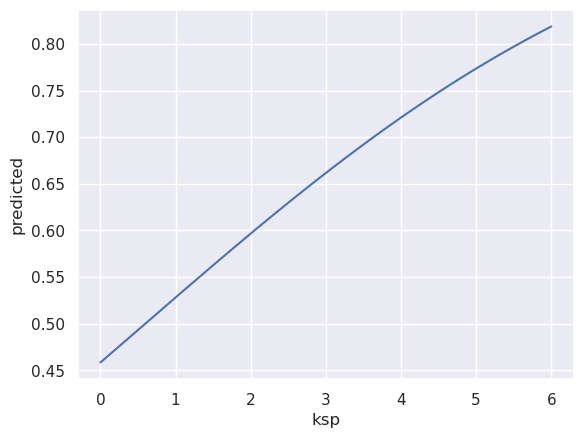

In [72]:
anfrage = pd.DataFrame()
anfrage['ksp'] = np.linspace(0, 6, 50)
sns.lineplot(x=anfrage.ksp, y=res.get_prediction(anfrage).summary_frame()['predicted']);

Wir sehen nur einen kleinen Ausschnitt aus der logistischen Kurve.  Wir ergänzen den Datenbereich der erklärenden Daten um unsinnige Werte, um die Gestalt der logistische Kurve zu zeigen

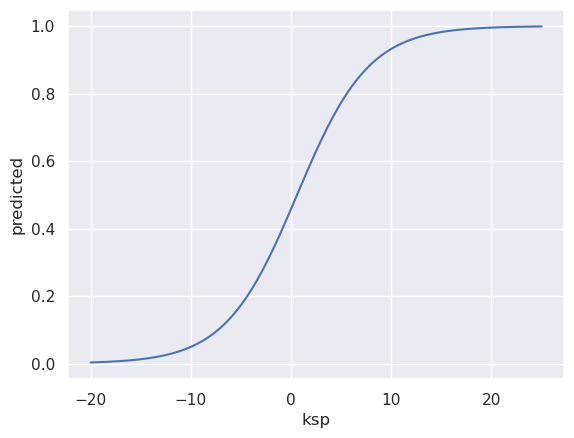

In [73]:
anfrage = pd.DataFrame()
anfrage['ksp'] = np.linspace(-20, 25, 150)
sns.lineplot(x=anfrage.ksp, y=res.get_prediction(anfrage).summary_frame()['predicted']);

* Die logistische Kurve ist 
$$
    y = \frac1{1+e^{-b - m \cdot x}}
$$
* Logistische Regression findet die optimale Annäherung an die Datenpunkte durch eine logistische Kurve

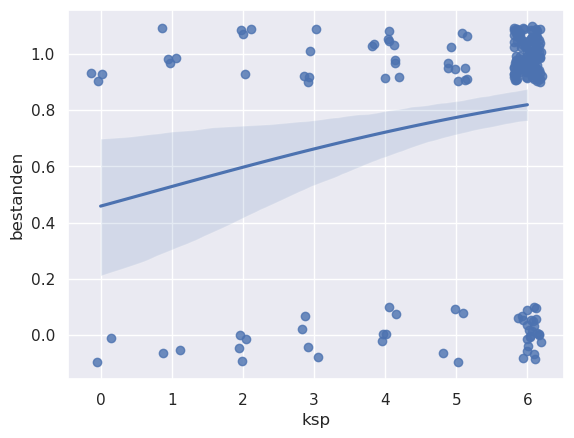

In [75]:
sns.regplot(df, x='ksp', y='bestanden', logistic=True, y_jitter=0.1, x_jitter=0.2);